In [1]:
# importamos las librerias a utilizar 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Cargamos nuestro conjunto de datos

In [2]:
data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
data

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [4]:
# test_data

Procedemos a revisar la informacion de las columnas 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

Eliminamos 'Unnamed' y 'id' de nuestros conjuntos de datos para tener una mejor organizacion.

In [6]:
data.drop(['Unnamed: 0', 'id'], axis= 1, inplace= True)
test_data.drop(['Unnamed: 0', 'id'], axis= 1, inplace= True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [8]:
data.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Separamos entre datos categoricos y numericos

In [9]:
columnas_categoricas = ['Inflight wifi service', 'Departure/Arrival time convenient', 
                        'Ease of Online booking', 'Gate location', 'Food and drink', 
                        'Online boarding', 'Seat comfort', 'Inflight entertainment', 
                        'On-board service', 'Leg room service', 'Baggage handling', 
                        'Checkin service', 'Inflight service', 'Cleanliness']

In [10]:
data[columnas_categoricas] = data[columnas_categoricas].astype(object)

In [11]:
#data.info()

In [12]:
columnas_categoricas = data.select_dtypes(object).columns.to_list()
print(columnas_categoricas)
print()
columnas_numericas = data.select_dtypes(np.number).columns.to_list()
print(columnas_numericas)

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction']

['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


Graficamos los casos de 'neutral or dissatisfied' y 'satisfaction' 

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
dtype: int64

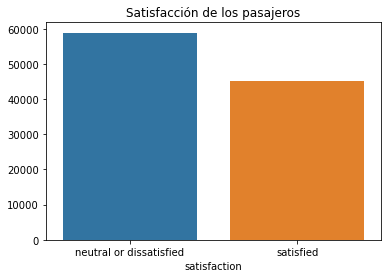

In [13]:
satisfaccion = data.groupby('satisfaction').size()
sns.barplot(x = satisfaccion.index, y = satisfaccion.values)
plt.title("Satisfacción de los pasajeros")
#plt.savefig('satisfaccion.png')
satisfaccion

* 58,879 de los pasajeros se encuentran neutral o insatisfechos, mientras que 45,025 se encuentran satisfechos

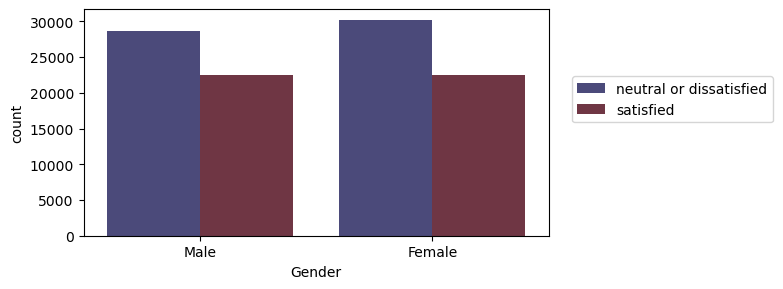

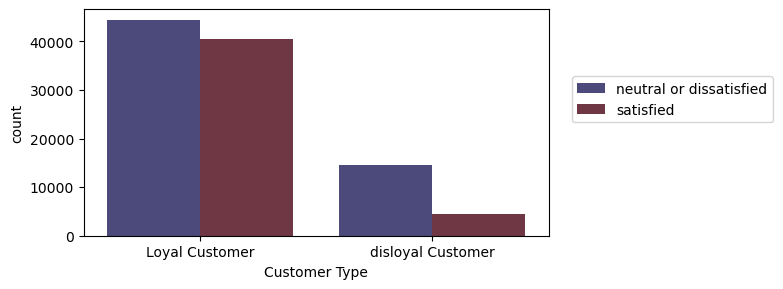

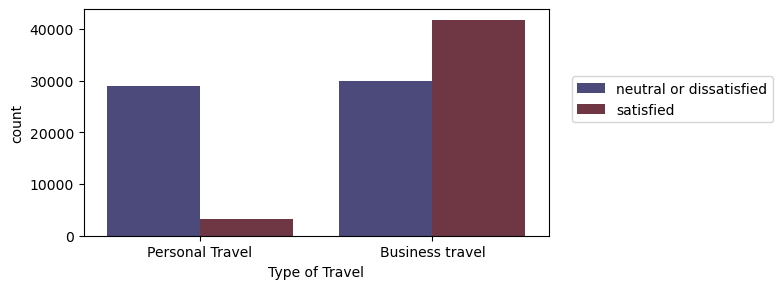

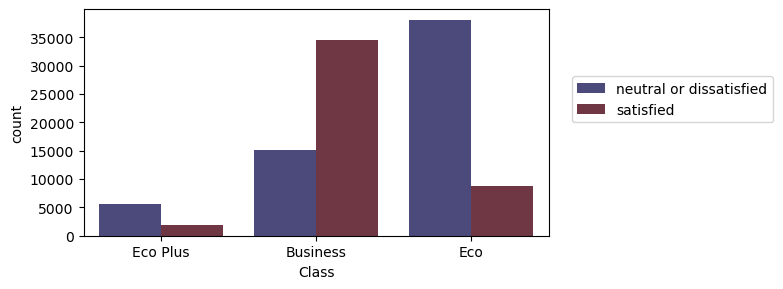

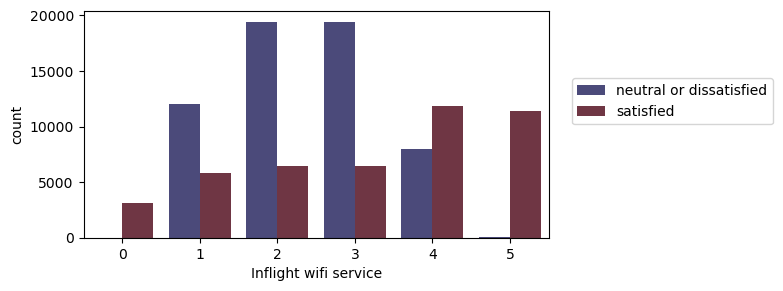

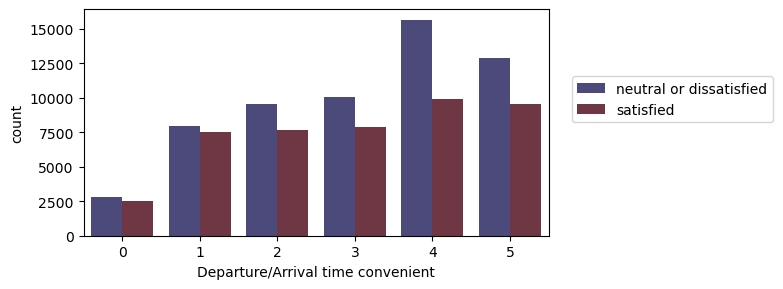

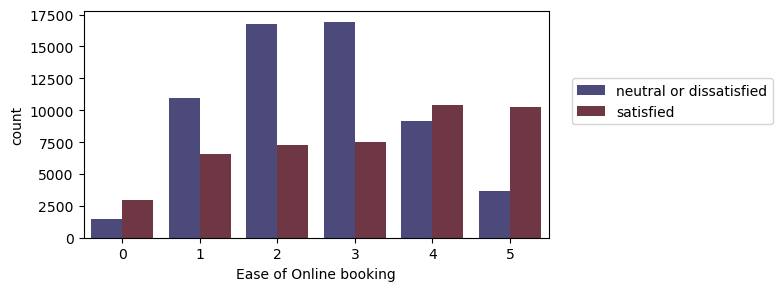

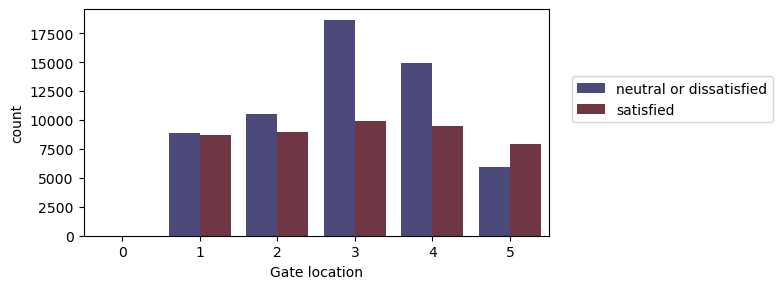

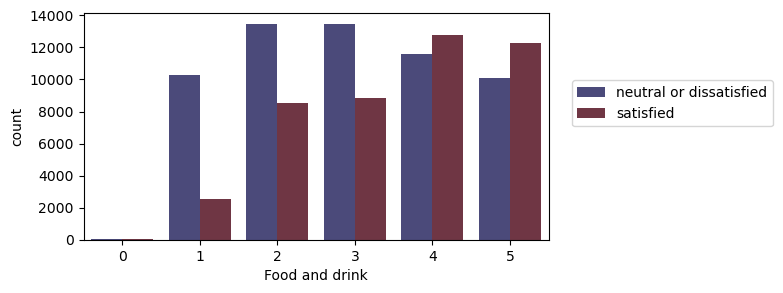

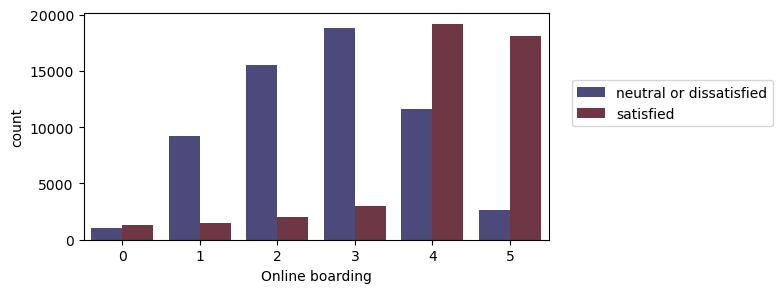

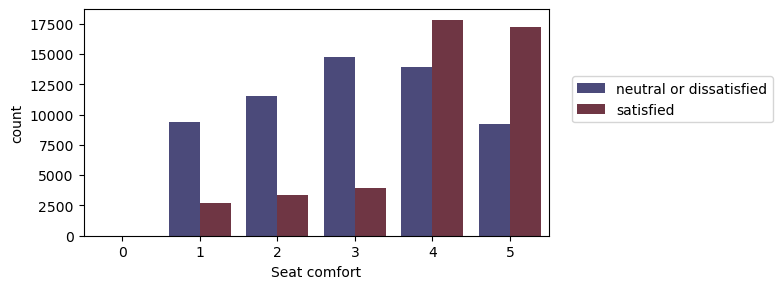

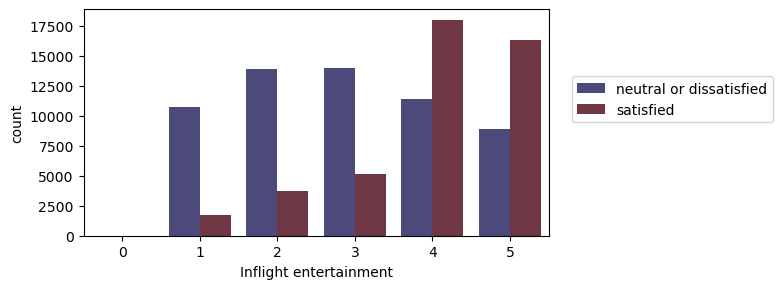

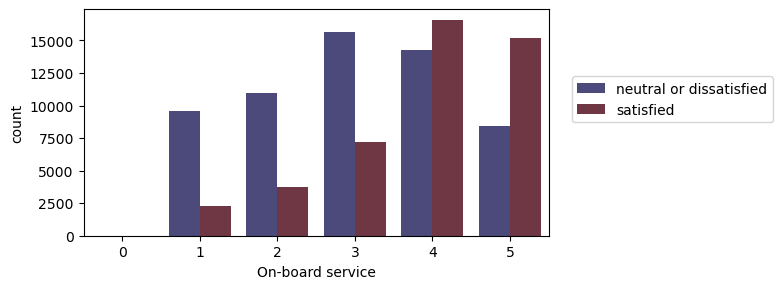

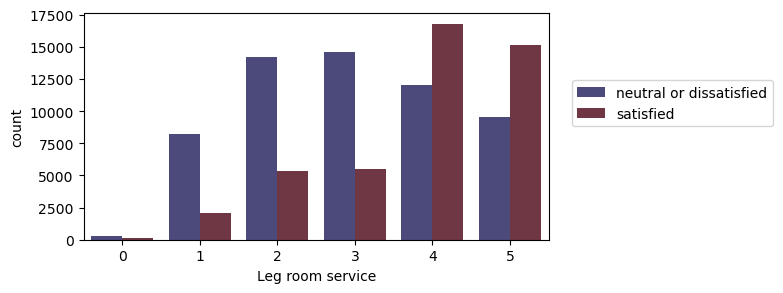

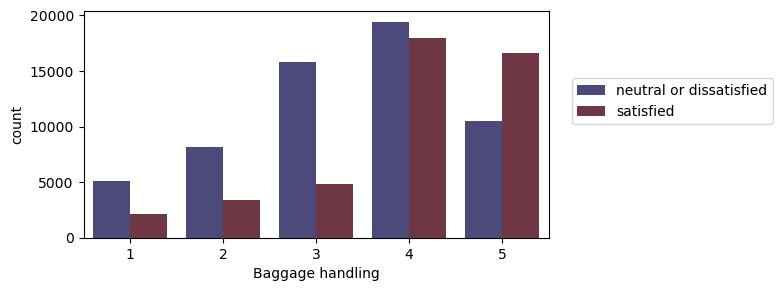

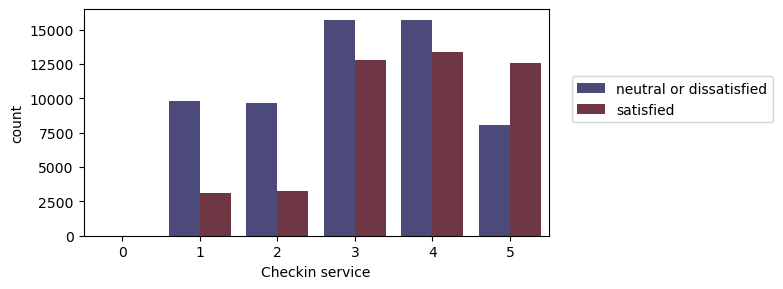

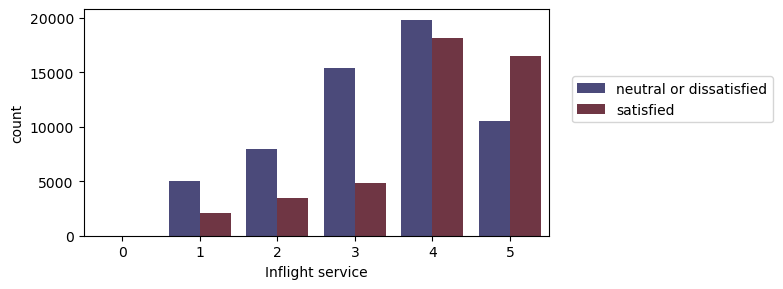

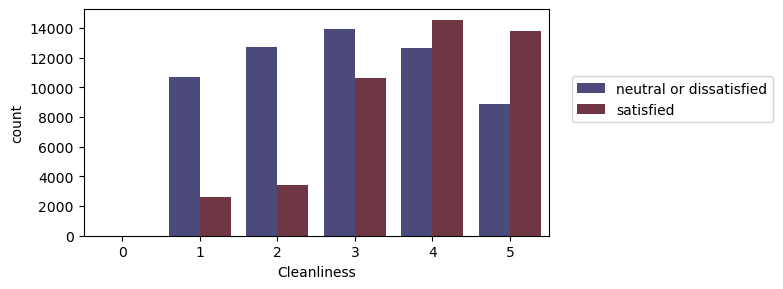

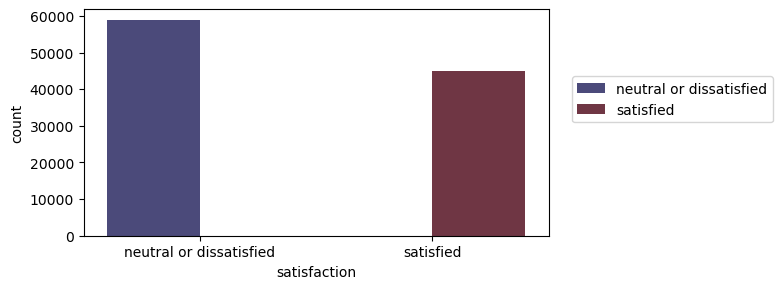

In [14]:
for col in columnas_categoricas:
    plt.figure(figsize = (6, 3), dpi = 100)
    sns.countplot(data = data, x = col, hue = 'satisfaction', palette = 'icefire')
    plt.legend(loc = (1.05, 0.5))
    plt.show()

In [15]:
valor_maximo = data['Age'].max()
valor_minimo = data['Age'].min()

print("Valor máximo:", valor_maximo)
print("Valor mínimo:", valor_minimo)

Valor máximo: 85
Valor mínimo: 7


In [16]:
valor_maximo = data['Flight Distance'].max()
valor_minimo = data['Flight Distance'].min()

print("Valor máximo:", valor_maximo)
print("Valor mínimo:", valor_minimo)

Valor máximo: 4983
Valor mínimo: 31


In [17]:
valor_maximo = data['Departure Delay in Minutes'].max()
valor_minimo = data['Departure Delay in Minutes'].min()

print("Valor máximo:", valor_maximo)
print("Valor mínimo:", valor_minimo)

Valor máximo: 1592
Valor mínimo: 0


In [18]:
valor_maximo = data['Arrival Delay in Minutes'].max()
valor_minimo = data['Arrival Delay in Minutes'].min()

print("Valor máximo:", valor_maximo)
print("Valor mínimo:", valor_minimo)

Valor máximo: 1584.0
Valor mínimo: 0.0


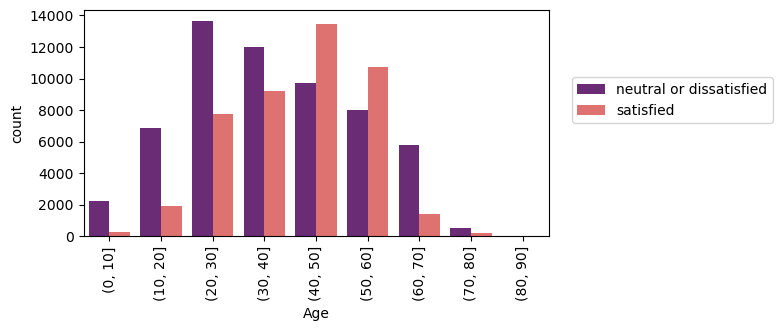

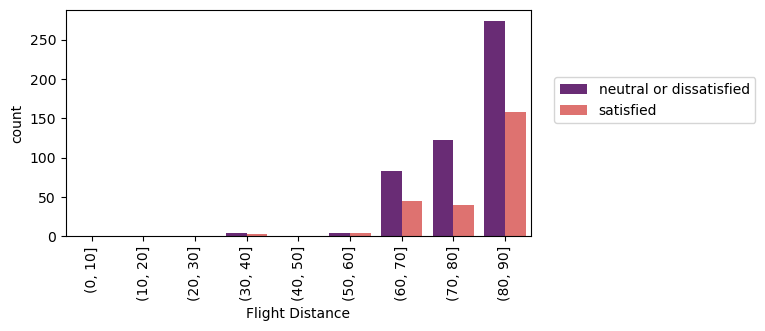

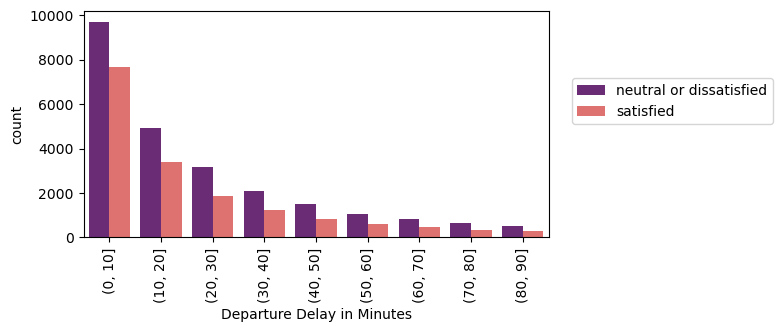

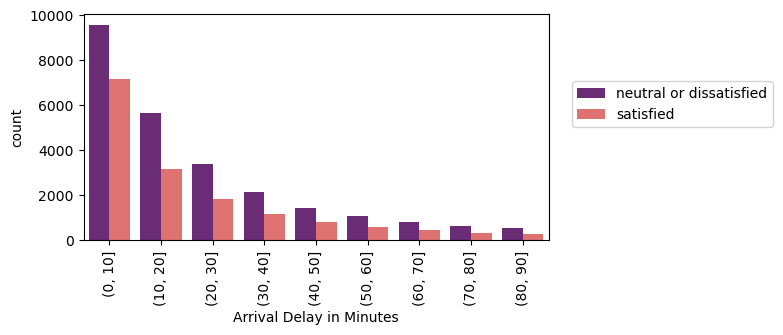

In [23]:
#for col in columnas_numericas:
#    plt.figure(figsize=(6, 3), dpi = 100)
#    rangos = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
#    data[col] = pd.cut(data[col], bins = rangos)
#    sns.countplot(data=data, x = col, hue = 'satisfaction', palette = 'magma')
#    plt.xticks(rotation = 90)
#    plt.legend(loc=(1.05, 0.5))
#    plt.show()

In [19]:
# !pip install scikit-plot

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn import model_selection
import scikitplot

In [21]:
# Tomamos una muestra aleatoria de tamaño 1000 de nuestro conjunto de datos data.

muestra_data = data.sample(1000)

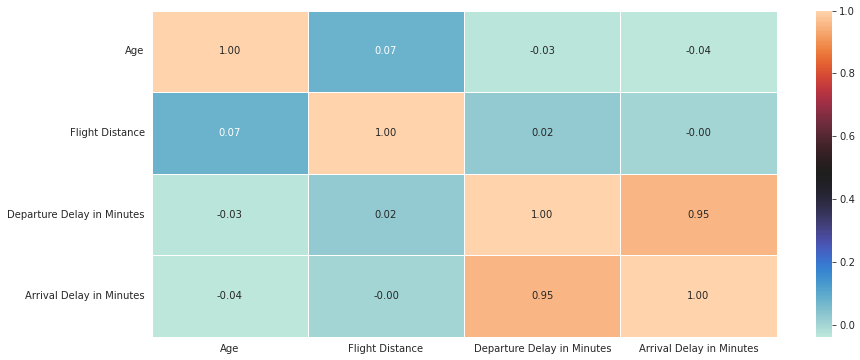

In [22]:
# Graficamos las correlaciones entre los atributos del conjunto de datos muestra_data.

with sns.axes_style('white'):
    plt.figure(figsize= (14, 6))
    sns.heatmap(muestra_data.corr(), annot = True, fmt = '.2f', linewidths= 0.8, cmap="icefire")

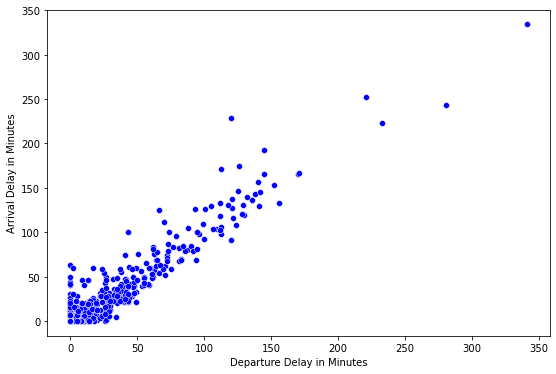

In [23]:
# Graficamos la dispersión que muestra la relación entre los retrasos de salida y llegada de vuelos.

plt.figure(figsize = (9, 6))
sns.scatterplot(x = 'Departure Delay in Minutes', y = 'Arrival Delay in Minutes', data = muestra_data, color = 'blue')
plt.show()

El retraso en la salida y el retraso en la llegada tienen una correlacion alta, por lo que decidimos eliminar el retraso en la salida del vuelo, para no contar con problemas de multicolinealidad.

In [24]:
data.drop('Departure Delay in Minutes', axis = 1, inplace= True)
test_data.drop('Departure Delay in Minutes', axis = 1, inplace= True)

In [25]:
# revisamos los valores nulos de cada columna.

data.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [26]:
# Calculamos la mediana de la columna 'Arrival Delay in Minutes' en el conjunto de datos data.
mediana = data['Arrival Delay in Minutes'].median()

# Reemplazamos los valores faltantes (NaN) en la columna 'Arrival Delay in Minutes' con el valor de la mediana. 
data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].fillna(mediana)
test_data['Arrival Delay in Minutes'] = test_data['Arrival Delay in Minutes'].fillna(mediana)

In [27]:
# Revisamos la cantidad de valores únicos en cada columna categórica del conjunto de datos.
data[columnas_categoricas].nunique()

Gender                               2
Customer Type                        2
Type of Travel                       2
Class                                3
Inflight wifi service                6
Departure/Arrival time convenient    6
Ease of Online booking               6
Gate location                        6
Food and drink                       6
Online boarding                      6
Seat comfort                         6
Inflight entertainment               6
On-board service                     6
Leg room service                     6
Baggage handling                     5
Checkin service                      6
Inflight service                     6
Cleanliness                          6
satisfaction                         2
dtype: int64

In [28]:
columns_containing_0 = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Checkin service', 'Inflight service', 'Cleanliness']
modes = data[columns_containing_0].mode()
data[columns_containing_0] = data[columns_containing_0].replace({'0': modes})
test_data[columns_containing_0] = test_data[columns_containing_0].replace({'0': modes})

In [29]:
data['Flight Distance'] = np.log1p(data['Flight Distance'])
test_data['Flight Distance'] = np.log1p(test_data['Flight Distance'])
test_data['Arrival Delay in Minutes'] = np.log1p(test_data['Arrival Delay in Minutes'])

Codificamos nuestras columnas categoricas con scikit-learn usando LabelEncoder.

In [30]:
from sklearn import preprocessing

Label_E = preprocessing.LabelEncoder()
data['Gender'] = Label_E.fit_transform(data['Gender'])
data['Customer Type'] = Label_E.fit_transform(data['Customer Type'])
data['Type of Travel'] = Label_E.fit_transform(data['Type of Travel'])
data['Class'] = Label_E.fit_transform(data['Class'])
data['satisfaction'] = Label_E.fit_transform(data['satisfaction'])

test_data['Gender'] = Label_E.fit_transform(test_data['Gender'])
test_data['Customer Type'] = Label_E.fit_transform(test_data['Customer Type'])
test_data['Type of Travel'] = Label_E.fit_transform(test_data['Type of Travel'])
test_data['Class'] = Label_E.fit_transform(test_data['Class'])
test_data['satisfaction'] = Label_E.fit_transform(test_data['satisfaction'])

In [31]:
X_train = data.drop('satisfaction', axis = 1)
y_train = data.satisfaction

X_test = test_data.drop('satisfaction', axis=1)
y_test = test_data.satisfaction

In [32]:
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')


KNN = KNeighborsClassifier(n_neighbors = 3)

L_R = LogisticRegression()

N_B = GaussianNB()

In [34]:
from sklearn.model_selection import cross_val_score

def cross_val_print(Modelo, Matriz, Vector, k):
    Ex = cross_val_score(Modelo, Matriz, Vector, cv = k, scoring = "accuracy") 
    Pr = cross_val_score(Modelo, Matriz, Vector, cv = k, scoring = "precision_weighted") 
    Se = cross_val_score(Modelo, Matriz, Vector, cv = k, scoring = "recall_weighted") 
    F1 = cross_val_score(Modelo, Matriz, Vector, cv = k, scoring = "f1_weighted")
    
    print(f"Exactitud (Accuracy):\n\tVector = {Ex}\n\tPromedio = {Ex.mean()}")
    print(f"Precisión:\n\tVector = {Pr}\n\tPromedio = {Pr.mean()}")
    print(f"Sensibilidad (Recall):\n\tVector = {Se}\n\tPromedio = {Se.mean()}")
    print(f"F1:\n\tVector = {F1}\n\tPromedio = {F1.mean()}")
    print(f"\nPromedio de los promedios = {(Ex.mean() + Pr.mean() + Se.mean() + F1.mean())/4}")

### Regresion Logistica

In [35]:
print("Regresion Logistica\n")
cross_val_print(L_R, X_train, y_train, 5)

Regresion Logistica

Exactitud (Accuracy):
	Vector = [0.8753188  0.87281652 0.87334584 0.87512632 0.87993263]
	Promedio = 0.8753080211022329
Precisión:
	Vector = [0.87527357 0.87274981 0.87319014 0.87501067 0.87976501]
	Promedio = 0.875197838597999
Sensibilidad (Recall):
	Vector = [0.8753188  0.87281652 0.87334584 0.87512632 0.87993263]
	Promedio = 0.8753080211022329
F1:
	Vector = [0.87491067 0.87240239 0.87302643 0.87477718 0.87971163]
	Promedio = 0.8749656605047539

Promedio de los promedios = 0.8751948853268047


In [36]:
L_R.fit(X_train, y_train)
#k = KFold(n_splits = 5)
#score = cross_val_score(L_R, X_train, y_train, scoring = 'accuracy', cv = k).mean()
#print("Accuracy:", round(score, 3))

LogisticRegression()

In [37]:
y_pred = L_R.predict(X_test)
#print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))

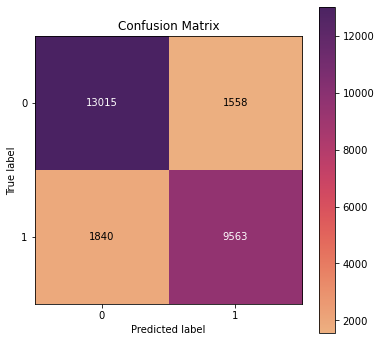

In [38]:
scikitplot.metrics.plot_confusion_matrix(y_test, y_pred, figsize=(6,6), cmap= 'flare');

In [44]:
from sklearn.metrics import roc_curve, roc_auc_score

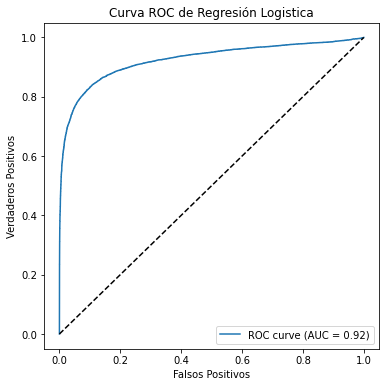

In [66]:
y_pred_prob = L_R.predict_proba(X_test)[:, 1]

# Calcular la tasa de falsos positivos, la tasa de verdaderos positivos y los umbrales
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calcular el área bajo la curva ROC (AUC)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Graficar la curva ROC
plt.figure(figsize = (6, 6))
plt.plot(fpr, tpr, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Línea base (AUC = 0.5)
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdaderos Positivos')
plt.title('Curva ROC de Regresión Logistica')
plt.legend(loc = 'lower right')
plt.show()

### Naive Bayes

In [48]:
print("Naive Bayes\n")
cross_val_print(N_B, X_train, y_train, 5)

Naive Bayes

Exactitud (Accuracy):
	Vector = [0.86641644 0.86612771 0.86550214 0.86814879 0.87536092]
	Promedio = 0.8683112012022901
Precisión:
	Vector = [0.86648672 0.86626829 0.86546977 0.8682619  0.87528761]
	Promedio = 0.8683548576431092
Sensibilidad (Recall):
	Vector = [0.86641644 0.86612771 0.86550214 0.86814879 0.87536092]
	Promedio = 0.8683112012022901
F1:
	Vector = [0.86584651 0.86551416 0.86499072 0.8675716  0.87497556]
	Promedio = 0.8677797107995493

Promedio de los promedios = 0.8681892427118096


In [49]:
N_B.fit(X_train, y_train)
#k = KFold(n_splits = 5)
#score = cross_val_score(N_B , X_train, y_train, scoring = 'accuracy', cv = k).mean()
#print("Accuracy:", round(score, 3))

GaussianNB()

In [50]:
y_pred = N_B.predict(X_test)
#print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))

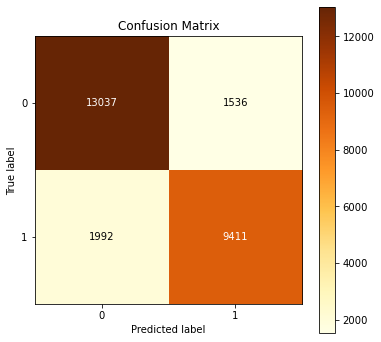

In [51]:
scikitplot.metrics.plot_confusion_matrix(y_test, y_pred, figsize=(6,6), cmap= 'YlOrBr');

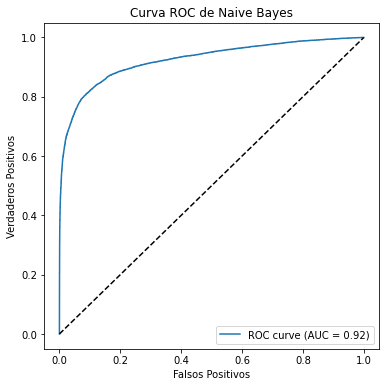

In [67]:
y_pred_prob = N_B.predict_proba(X_test)[:, 1]

# Calcular la tasa de falsos positivos, la tasa de verdaderos positivos y los umbrales
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calcular el área bajo la curva ROC (AUC)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Graficar la curva ROC
plt.figure(figsize = (6, 6))
plt.plot(fpr, tpr, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Línea base (AUC = 0.5)
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdaderos Positivos')
plt.title('Curva ROC de Naive Bayes')
plt.legend(loc = 'lower right')
plt.show()

### KNN

In [53]:
print("KNN\n")
cross_val_print(KNN, X_train, y_train, 5)

KNN

Exactitud (Accuracy):
	Vector = [0.92445022 0.925557   0.92507579 0.92574948 0.9280077 ]
	Promedio = 0.92576803818584
Precisión:
	Vector = [0.92532327 0.92636133 0.92590533 0.92684241 0.92886636]
	Promedio = 0.9266597400476145
Sensibilidad (Recall):
	Vector = [0.92445022 0.925557   0.92507579 0.92574948 0.9280077 ]
	Promedio = 0.92576803818584
F1:
	Vector = [0.92408537 0.92521232 0.92472322 0.92535578 0.92766968]
	Promedio = 0.9254092735019069

Promedio de los promedios = 0.9259012724803004


In [54]:
KNN.fit(X_train, y_train)
#k = KFold(n_splits = 5)
#score = cross_val_score(KNN, X_train, y_train, scoring = 'accuracy', cv = k).mean()
#print("Accuracy:", round(score, 3))

KNeighborsClassifier(n_neighbors=3)

In [55]:
y_pred = KNN.predict(X_test)
#print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))

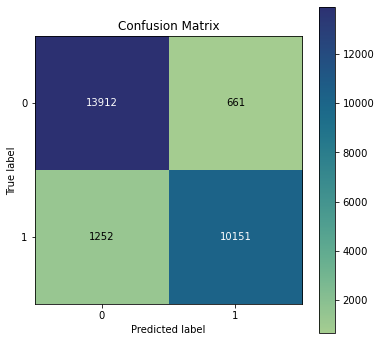

In [56]:
scikitplot.metrics.plot_confusion_matrix(y_test, y_pred, figsize=(6,6), cmap= 'crest');

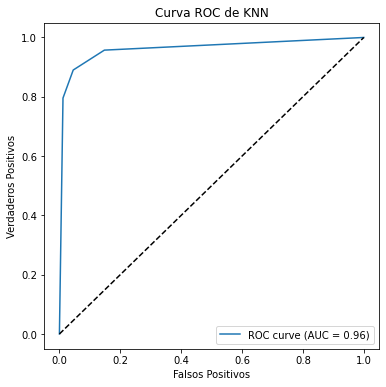

In [68]:
y_pred_prob = KNN.predict_proba(X_test)[:, 1]

# Calcular la tasa de falsos positivos, la tasa de verdaderos positivos y los umbrales
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calcular el área bajo la curva ROC (AUC)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Graficar la curva ROC
plt.figure(figsize = (6, 6))
plt.plot(fpr, tpr, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Línea base (AUC = 0.5)
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdaderos Positivos')
plt.title('Curva ROC de KNN')
plt.legend(loc = 'lower right')
plt.show()

KNN: 0.928540 (0.002883)
N_B: 0.868359 (0.003944)
L_R: 0.875443 (0.002916)


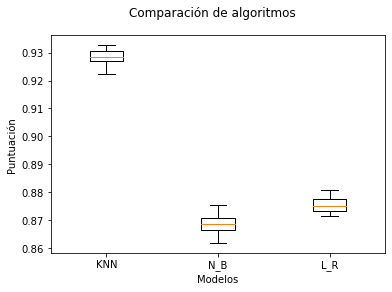

In [59]:
models = list()
models.append(('KNN', KNeighborsClassifier()))
models.append(('N_B', GaussianNB()))
models.append(('L_R', LogisticRegression()))
#evaluar cada modelo
results = list()
names = list()
for columnas_numericas, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state = 0, shuffle = True)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'accuracy')
    results.append(cv_results)
    names.append(columnas_numericas)
    print("%s: %f (%f)" %(columnas_numericas, cv_results.mean(), cv_results.std()))
    
#comparación de algoritmos 
fig = plt.figure()
fig.suptitle('Comparación de algoritmos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xlabel('Modelos')
plt.ylabel('Puntuación')
plt.show()
#plt.savefig('comparacion.png')

### Modelo ganador

El modelo ganador es KNN ya que tuvo el mayor promedio en todas las metricas, de ahi le sigue Regresion Logistica y como el peor tenemos a Naive Bayes.